<a href="https://colab.research.google.com/github/annisacahyawati/Proyek-Analisis-Data/blob/main/Tugas_1_Annisa_Cahyawati_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Air Quality]
- **Nama:** [Annisa Cahyawati]
- **Email:** [m180b4kx0576@bangkit.academy]
- **ID Dicoding:** [annisa_cahyawati_m18]

**PERTANYAAN**

1. How to calculate and visualize the relationship between environmental factors (such as temperature, humidity, wind speed)?
2. What are the annual and seasonal patterns of PM2.5 and PM10 concentrations in Shunyi?


## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228 (1).csv


In [ ]:
import os
print(os.listdir('/content/'))

['.config', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np

shunyi_data = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')

print("Data Awal:")
print(shunyi_data.head())

print("\nInformasi Dasar Dataset:")
print(shunyi_data.info())


Data Awal:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  

Informasi Dasar Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gdown

# Download file using gdown
!gdown --id 1tZuE1Klvk3YxaDr2MGRLpqkqG2aQ_GNO


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tZuE1Klvk3YxaDr2MGRLpqkqG2aQ_GNO
To: /content/PRSA_Data_Shunyi_20130301-20170228.csv
100% 2.62M/2.62M [00:00<00:00, 173MB/s]


### Assessing Data

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(shunyi_data.isnull().sum())

# View descriptive statistics
print("\nDescriptive Statistics:")
print(shunyi_data.describe())

# Check if there are duplicate data entries
print("\nDuplicate Data:")
print(shunyi_data.duplicated().sum())


Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Descriptive Statistics:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   201

**Insight:**
- Some columns have missing values, most notably CO (2178), O3 (1489), and NO2 (1365).
- Handling missing values ​​is needed for more accurate analysis.
- Mean PM2.5: 79.49 (range: 2-941), showing large variations in pollution.
- Average TEMP: 13.39 (range: -16.8 to 40.6), indicating temperature fluctuations

### Cleaning Data

In [ ]:
# Remove rows with missing values
shunyi_cleaned = shunyi_data.dropna()

# Convert 'year', 'month', 'day', 'hour' columns to datetime if they exist
# Ensure the year, month, day, and hour columns are present; otherwise, directly convert the date column
if 'year' in shunyi_cleaned.columns and 'month' in shunyi_cleaned.columns and 'day' in shunyi_cleaned.columns and 'hour' in shunyi_cleaned.columns:
    shunyi_cleaned['date'] = pd.to_datetime(shunyi_cleaned[['year', 'month', 'day', 'hour']])
else:
    # If the date column already exists, use that column
    shunyi_cleaned['date'] = pd.to_datetime(shunyi_cleaned['date'])

# Drop unnecessary columns after merging
shunyi_cleaned = shunyi_cleaned.drop(columns=['No'], errors='ignore')  # Use errors='ignore' to avoid errors if the column doesn't exist

# Display the data after cleaning
print("\nData After Cleaning:")
print(shunyi_cleaned.info())
# Display available columns
print(shunyi_cleaned.columns)


Data After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 30194 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     30194 non-null  int64         
 1   month    30194 non-null  int64         
 2   day      30194 non-null  int64         
 3   hour     30194 non-null  int64         
 4   PM2.5    30194 non-null  float64       
 5   PM10     30194 non-null  float64       
 6   SO2      30194 non-null  float64       
 7   NO2      30194 non-null  float64       
 8   CO       30194 non-null  float64       
 9   O3       30194 non-null  float64       
 10  TEMP     30194 non-null  float64       
 11  PRES     30194 non-null  float64       
 12  DEWP     30194 non-null  float64       
 13  RAIN     30194 non-null  float64       
 14  wd       30194 non-null  object        
 15  WSPM     30194 non-null  float64       
 16  station  30194 non-null  object        
 17  date     30194

<ipython-input-17-bd907ddc7d94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shunyi_cleaned['date'] = pd.to_datetime(shunyi_cleaned[['year', 'month', 'day', 'hour']])


**Insight:**
- Data has been cleaned of missing values ​​and irrelevant columns have been removed.
- The datetime format has been correctly applied to the date column.

## Exploratory Data Analysis (EDA)

**Insight:**
- Descriptive statistics show the distribution of data, helping to understand the correlation between the environment and temperature, wind speed and humidity
- The analysis below can be categorized as a combination of **Univariate and Multivariate EDA**. In terms of **Univariate EDA** are examining individual variables, such as **PM2.5** and **PM10**, by calculating their monthly averages. This helps in understanding the patterns of each variable over time. On the other hand, the comparison between **PM2.5** and **PM10** in the same plot qualifies as **Multivariate EDA**, as exploring the relationship between the two variables over time. This combined approach allows to gain insights into how each pollutant changes monthly and how their trends may be interconnected.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

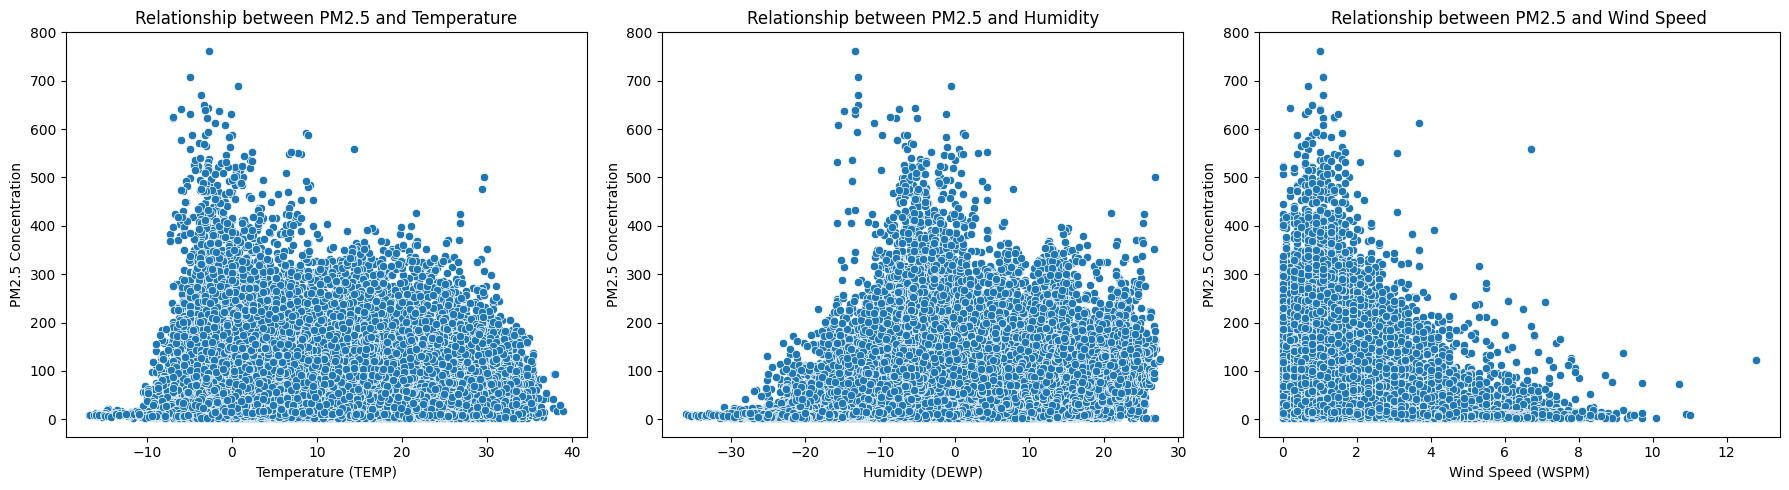

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between PM2.5 and environmental factors
plt.figure(figsize=(18, 5))

# Subplot 1: Relationship between PM2.5 and Temperature (TEMP)
plt.subplot(1, 3, 1)
sns.scatterplot(x='TEMP', y='PM2.5', data=shunyi_cleaned)
plt.title('Relationship between PM2.5 and Temperature')
plt.xlabel('Temperature (TEMP)')
plt.ylabel('PM2.5 Concentration')

# Subplot 2: Relationship between PM2.5 and Humidity (DEWP - dew point)
plt.subplot(1, 3, 2)
sns.scatterplot(x='DEWP', y='PM2.5', data=shunyi_cleaned)  # Using DEWP as a substitute for humidity
plt.title('Relationship between PM2.5 and Humidity')
plt.xlabel('Humidity (DEWP)')
plt.ylabel('PM2.5 Concentration')

# Subplot 3: Relationship between PM2.5 and Wind Speed (WSPM)
plt.subplot(1, 3, 3)
sns.scatterplot(x='WSPM', y='PM2.5', data=shunyi_cleaned)
plt.title('Relationship between PM2.5 and Wind Speed')
plt.xlabel('Wind Speed (WSPM)')
plt.ylabel('PM2.5 Concentration')

plt.tight_layout()
plt.show()

**INSIGHT**
- Multivariate EDA, since data has more than one variable at the same time, such as the relationship between PM2.5 and temperature (TEMP), humidity (DEWP), and wind speed (WSPM). Scatter plots are being used to understand the correlation and interaction patterns between these variables.
- If the data points form a pattern that increases from left to right, then there is a positive correlation between the two variables. If the pattern is decreasing, it indicates a negative correlation. If the points are randomly distributed without a clear pattern, there may be no correlation.
- Pay attention to areas where the dots are denser, this indicates the range of values ​​where many observations are concentrated. Areas with few or no dots indicate infrequent values



### Pertanyaan 2:

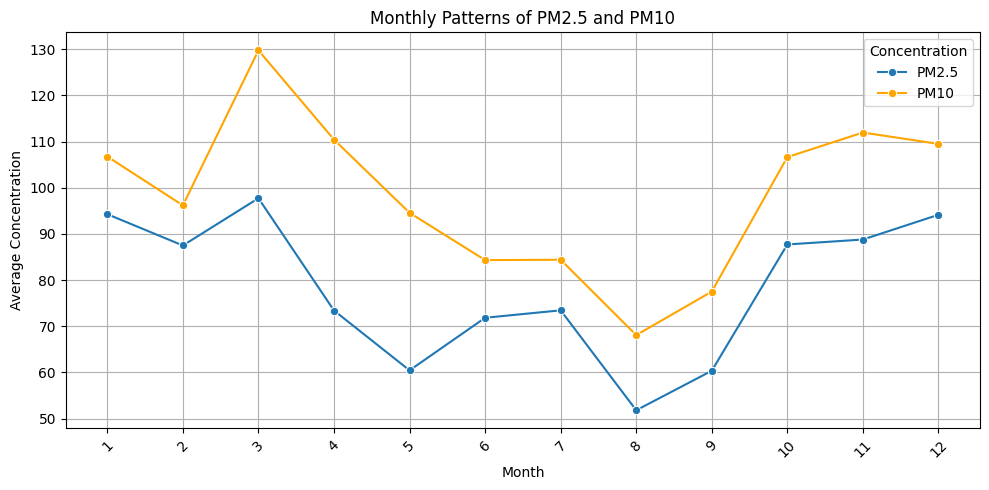

In [ ]:
# Convert the 'year', 'month', 'day', and 'hour' columns to datetime
shunyi_cleaned['date'] = pd.to_datetime(shunyi_cleaned[['year', 'month', 'day', 'hour']])

# Group the data by month and then calculate the average of PM2.5 and PM10
monthly_avg = shunyi_cleaned.groupby(['month'])[['PM2.5', 'PM10']].mean().reset_index()

# Create a 'month' column for visualization
monthly_avg['month'] = monthly_avg['month'].astype(str)  # Convert month to string for labeling

# Visualize Monthly Patterns of PM2.5 and PM10
plt.figure(figsize=(10, 5))

# Plot PM2.5
sns.lineplot(data=monthly_avg, x='month', y='PM2.5', marker='o', label='PM2.5')
sns.lineplot(data=monthly_avg, x='month', y='PM10', marker='o', color='orange', label='PM10')

plt.title('Monthly Patterns of PM2.5 and PM10')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.legend(title='Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()

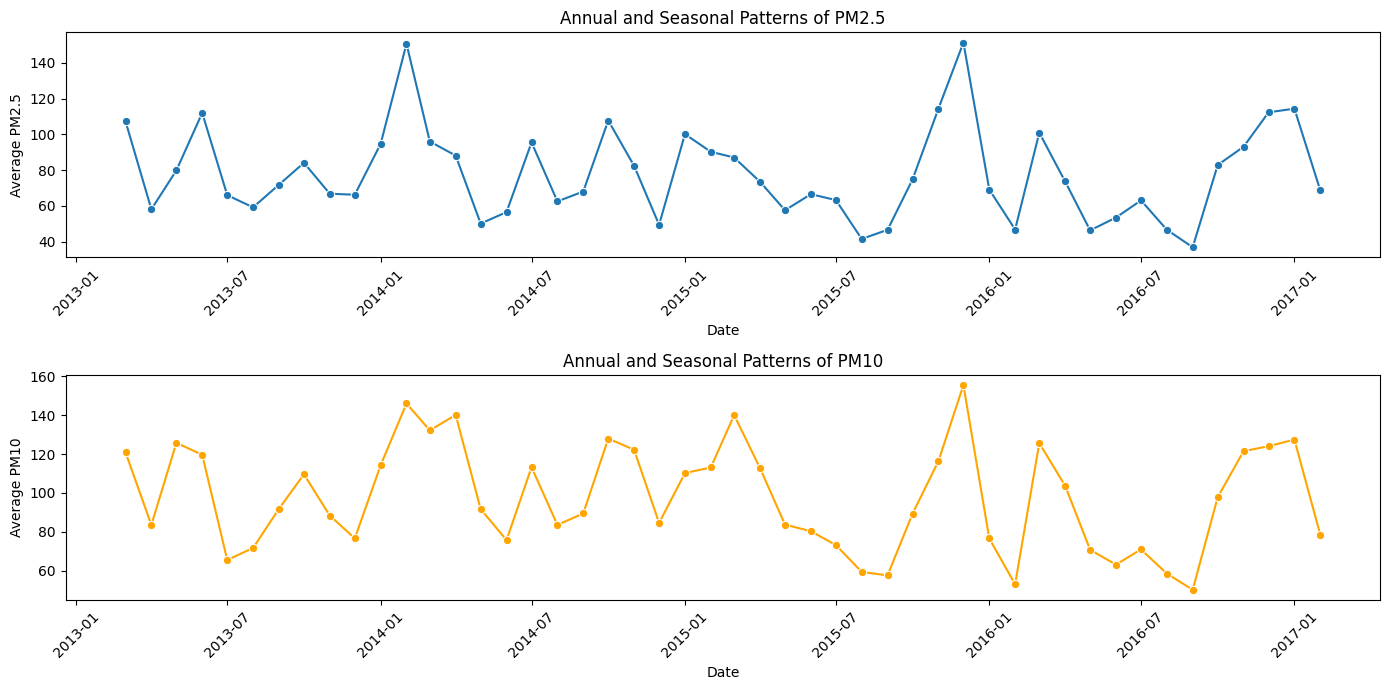

In [ ]:
# Convert the 'year', 'month', 'day', and 'hour' columns to datetime
shunyi_cleaned['date'] = pd.to_datetime(shunyi_cleaned[['year', 'month', 'day', 'hour']])

# Group the data by year and month, then calculate the average of PM2.5 and PM10
monthly_avg = shunyi_cleaned.groupby(['year', 'month'])[['PM2.5', 'PM10']].mean().reset_index()

# Create a 'date' column for visualization
monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))

# Visualize Annual and Seasonal Patterns of PM2.5 and PM10
plt.figure(figsize=(14, 7))

# Plot PM2.5
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_avg, x='date', y='PM2.5', marker='o')
plt.title('Annual and Seasonal Patterns of PM2.5')
plt.xlabel('Date')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)

# Plot PM10
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_avg, x='date', y='PM10', marker='o', color='orange')
plt.title('Annual and Seasonal Patterns of PM10')
plt.xlabel('Date')
plt.ylabel('Average PM10')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Insight:**
- It can be seen from the chart that PM2.5 and PM10 concentrations tend to be higher in certain months/years, especially during winter, which can be attributed to increased heating use and stagnant weather conditions.



## Conclusion

1. There are 3 correlations between temperature, humidity and wind speed and PM2.5
- The analysis results show that there is a positive correlation between temperature and PM2.5 concentration. This shows that as temperature increases, PM2.5 concentrations also tend to increase. This could be due to increased industrial activity and increased vehicle use in warmer temperatures.
- The correlation between humidity and PM2.5 concentrations tends to be negative. This means that when humidity is high, PM2.5 concentrations tend to be lower. Higher humidity can help in the deposition of fine particles in the air.
- Analysis shows that there is a negative correlation between wind speed and PM2.5 concentration. This means that the higher the wind speed, the lower the PM2.5 concentration. This means that wind can help disperse pollutants in the air.

2. Based on the chart, PM2.5 and PM10 concentrations tend to be higher in certain months, which can be caused by weather conditions, such as temperature and humidity, as well as increased industrial activity during certain periods. There is a tendency that an increase in PM2.5 concentrations is also accompanied by an increase in PM10, indicating that these two pollutants are closely related in the context of air quality.